# Imports for this Notebook 

In [1]:
import pandas as pd
import datetime

# Loading & preparing the datasets

In [2]:
df_pas = pd.read_csv('../data/MOPAC survey/PAS_buroughs.csv', delimiter=';')
df_pas_trust = df_pas[df_pas['Measure'] == 'Trust MPS']
df_pas_trust.columns = ['Date', 'Survey', 'Borough', 'Measure', 'Trust in Borough', 'Trust in London']
df_pas_trust = df_pas_trust.drop(columns=['Survey', 'Measure'])
df_pas_trust['Date'] = pd.to_datetime(df_pas_trust['Date'], format='%d/%m/%Y')

df_pas_trust["YearMonth"] = df_pas_trust["Date"].dt.strftime("%Y-%m")
df_pas_trust = df_pas_trust[['YearMonth', 'Borough', 'Trust in Borough', 'Trust in London']]

df_pas_trust['Borough'] = df_pas_trust['Borough'].replace('City of Westminster', 'Westminster')

best_boroughs = [
    'Kingston upon Thames', 'Bexley', 'Sutton',
    'Westminster', 'Kensington and Chelsea'
]
worst_boroughs = [
    'Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth'
]

df_pas_trust = df_pas_trust[df_pas_trust['Borough'].isin(best_boroughs + worst_boroughs)]
df_pas_trust = df_pas_trust[df_pas_trust['YearMonth'] >= '2016-05']

df_pas_trust.head(5)

,YearMonth,Borough,Trust in Borough,Trust in London
6754,2016-06,Bexley,"0,9","0,87"
6762,2016-06,Hackney,"0,86","0,87"
6764,2016-06,Haringey,"0,85","0,87"
6769,2016-06,Islington,"0,86","0,87"
6770,2016-06,Kensington and Chelsea,"0,92","0,87"


In [3]:
df_sas = pd.read_csv('../data/filtered_crime_data.csv')
df_sas['Date'] = pd.to_datetime(df_sas['Date'])
df_sas['YearMonth'] = df_sas['Date'].dt.to_period('M')
df_sas = df_sas.drop(columns=['Part of a policing operation', 'Policing operation', 'Latitude', 
                              'Longitude', 'Self-defined ethnicity', 'Legislation', 'borough',
                               'Outcome linked to object of search', 'Removal of more than just outer clothing'])

C:\Users\G2MIC\AppData\Local\Temp\ipykernel_7484\1378247699.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_sas['YearMonth'] = df_sas['Date'].dt.to_period('M')


In [4]:
df_sas_grouped = df_sas.groupby(['Borough', 'YearMonth', 'Object of search']).size().reset_index(name='Count stop and search')

In [5]:
df_sas_pivoted = df_sas_grouped.pivot_table(index=['YearMonth', 'Borough'],
                                        columns='Object of search',
                                        values='Count stop and search',
                                        aggfunc='sum').reset_index()

df_sas_pivoted.colums = ['YearMonth', 'Borough', 'Treatening or harmful item', 'Criminal damage items',
                                   'controlled drugs', 'Evidence of offences under the Act', 'Firearms', 
                                   'Fireworks', 'Offensive weapons', 'Stolen goods'
                                   ]

df_sas_pivoted = df_sas_pivoted.fillna(0)
df_sas_pivoted.head()

C:\Users\G2MIC\AppData\Local\Temp\ipykernel_7484\8448671.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_sas_pivoted.colums = ['YearMonth', 'Borough', 'Treatening or harmful item', 'Criminal damage items',


Object of search,YearMonth,Borough,Anything to threaten or harm anyone,Articles for use in criminal damage,Controlled drugs,Evidence of offences under the Act,Firearms,Fireworks,Offensive weapons,Stolen goods
0,2016-05,Lambeth,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2016-05,Lewisham,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,2016-06,Bexley,0.0,32.0,68.0,0.0,0.0,0.0,0.0,0.0
3,2016-06,Hackney,0.0,118.0,182.0,0.0,4.0,0.0,0.0,0.0
4,2016-06,Haringey,0.0,189.0,261.0,0.0,1.0,0.0,0.0,0.0


In [6]:
df_sas_10_17 = df_sas[df_sas['Age range'] == '10-17']
df_sas_10_17_grouped = df_sas_10_17.groupby(['Borough', 'YearMonth', 'Object of search']).size().reset_index(name='Count 10-17')

In [7]:
df_sas_10_17_pivoted = df_sas_10_17_grouped.pivot_table(index=['YearMonth', 'Borough'],
                                        columns='Object of search',
                                        values='Count 10-17',
                                        aggfunc='sum').reset_index()

df_sas_10_17_pivoted = df_sas_10_17_pivoted.fillna(0)
df_sas_10_17_pivoted.columns = ['YearMonth', 'Borough', 'Treatening or harmful item - 10-17', 'Criminal damage items - 10-17',
                                   'controlled drugs - 10-17', 'Evidence of offences under the Act - 10-17', 'Firearms - 10-17', 
                                   'Fireworks - 10-17', 'Offensive weapons - 10-17', 'Stolen goods - 10-17'
                                   ]
df_sas_10_17_pivoted.head()

,YearMonth,Borough,Treatening or harmful item - 10-17,Criminal damage items - 10-17,controlled drugs - 10-17,Evidence of offences under the Act - 10-17,Firearms - 10-17,Fireworks - 10-17,Offensive weapons - 10-17,Stolen goods - 10-17
0,2016-05,Lewisham,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2016-06,Bexley,0.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0
2,2016-06,Hackney,0.0,29.0,11.0,0.0,2.0,0.0,0.0,0.0
3,2016-06,Haringey,0.0,33.0,26.0,0.0,0.0,0.0,0.0,0.0
4,2016-06,Islington,0.0,61.0,33.0,0.0,1.0,0.0,0.0,0.0


In [8]:
df_homicide = pd.read_csv('..\data\Homicides_2003_2023.csv')
df_homicide['Month'] = df_homicide['Recorded Date'].str.split('-').str[0]
df_homicide['Year'] = '20' + df_homicide['Recorded Date'].str.split('-').str[1]
df_homicide['Year'] = df_homicide['Year'].astype(int)

month_to_number = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df_homicide['Month'] = df_homicide['Month'].map(month_to_number)

df_homicide['Date'] = pd.to_datetime(df_homicide[['Year', 'Month']].assign(day=1))

df_homicide["YearMonth"] = df_homicide["Date"].dt.to_period('M')

df_homicide = df_homicide[df_homicide['Borough'].isin(best_boroughs + worst_boroughs)]

df_homicide = df_homicide.drop(columns=['Recorded Date', 'Year', 'Month'])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\G2MIC\AppData\Local\Temp\ipykernel_7484\3707585569.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_homicide = pd.read_csv('..\data\Homicides_2003_2023.csv')


In [9]:
df_homicide_grouped_mok = df_homicide.groupby(['Borough', 'YearMonth', 'Method of Killing']).size().reset_index(name='Count homicide mok')

df_homicide_grouped_ooe = df_homicide.groupby(['Borough', 'YearMonth', 'Officer Observed Ethnicity']).size().reset_index(name='Count homicide ooe')

In [10]:
df_homicide_grouped_mok_pivoted = df_homicide_grouped_mok.pivot_table(index=['YearMonth', 'Borough'],
                                        columns='Method of Killing',
                                        values='Count homicide mok',
                                        aggfunc='sum').reset_index()

df_homicide_grouped_mok_pivoted = df_homicide_grouped_mok_pivoted.fillna(0)

df_homicide_grouped_mok_pivoted = df_homicide_grouped_mok_pivoted[df_homicide_grouped_mok_pivoted['YearMonth'] >= '2016-05']

df_homicide_grouped_mok_pivoted.head()

Method of Killing,YearMonth,Borough,Blunt Implement,Knife or Sharp Implement,Not known/Not Recorded,Other Methods of Killing,"Physical Assault, no weapon",Shooting
433,2016-05,Lewisham,0.0,1.0,0.0,0.0,0.0,0.0
434,2016-06,Hackney,1.0,0.0,0.0,0.0,0.0,0.0
435,2016-08,Haringey,0.0,1.0,0.0,0.0,0.0,1.0
436,2016-08,Islington,0.0,0.0,0.0,0.0,0.0,1.0
437,2016-08,Lewisham,0.0,2.0,0.0,0.0,1.0,0.0


In [11]:
df_homicide_grouped_ooe_pivoted = df_homicide_grouped_ooe.pivot_table(index=['YearMonth', 'Borough'],
                                        columns='Officer Observed Ethnicity',
                                        values='Count homicide ooe',
                                        aggfunc='sum').reset_index()

df_homicide_grouped_ooe_pivoted = df_homicide_grouped_ooe_pivoted.fillna(0)

df_homicide_grouped_ooe_pivoted = df_homicide_grouped_ooe_pivoted[df_homicide_grouped_ooe_pivoted['YearMonth'] >= '2016-05']

df_homicide_grouped_ooe_pivoted.head()

Officer Observed Ethnicity,YearMonth,Borough,Asian,Black,Other,Unrecorded / Unknown,White
433,2016-05,Lewisham,0.0,1.0,0.0,0.0,0.0
434,2016-06,Hackney,0.0,0.0,0.0,0.0,1.0
435,2016-08,Haringey,0.0,1.0,0.0,0.0,1.0
436,2016-08,Islington,0.0,1.0,0.0,0.0,0.0
437,2016-08,Lewisham,0.0,1.0,0.0,0.0,2.0


In [12]:
df_crime_best = pd.read_csv('../metropolitan_normal_with_best_boroughs.csv')

df_crime_best['Year'] = df_crime_best['Month'].str.split('-').str[0]
df_crime_best['Month'] = df_crime_best['Month'].str.split('-').str[1]
df_crime_best['Date'] = pd.to_datetime(df_crime_best[['Year', 'Month']].assign(day=1))

df_crime_best = df_crime_best.drop(columns=['Year', 'Month'])

df_crime_best['YearMonth'] = df_crime_best['Date'].dt.to_period('M')

In [13]:
df_crime_best_grouped = df_crime_best.groupby(['borough', 'YearMonth', 'Crime type']).size().reset_index(name='Count crime best')
df_crime_best_grouped.columns = ['Borough', 'YearMonth', 'Crime Type', 'Count crime']

In [14]:
df_crime_best_grouped_pivoted = df_crime_best_grouped.pivot_table(index=['YearMonth', 'Borough'],
                                        columns='Crime Type',
                                        values='Count crime',
                                        aggfunc='sum').reset_index()
df_crime_best_grouped_pivoted = df_crime_best_grouped_pivoted.fillna(0)
df_crime_best_grouped_pivoted = df_crime_best_grouped_pivoted[df_crime_best_grouped_pivoted['YearMonth'] >= '2016-05']

In [15]:
df_crime_worst = pd.read_csv('../metropolitan_normal_with_worst_boroughs.csv')

df_crime_worst['Year'] = df_crime_worst['Month'].str.split('-').str[0]
df_crime_worst['Month'] = df_crime_worst['Month'].str.split('-').str[1]
df_crime_worst['Date'] = pd.to_datetime(df_crime_worst[['Year', 'Month']].assign(day=1))

df_crime_worst['YearMonth'] = df_crime_worst['Date'].dt.to_period('M')

df_crime_worst = df_crime_worst.drop(columns=['Year', 'Month'])

In [16]:
df_crime_worst_grouped = df_crime_worst.groupby(['borough', 'YearMonth', 'Crime type']).size().reset_index(name='Count crime worst')
df_crime_worst_grouped.columns = ['Borough', 'YearMonth', 'Crime Type', 'Count crime']

In [17]:
df_crime_worst_grouped_pivoted = df_crime_worst_grouped.pivot_table(index=['YearMonth', 'Borough'],
                                        columns='Crime Type',
                                        values='Count crime',
                                        aggfunc='sum').reset_index()
df_crime_worst_grouped_pivoted = df_crime_worst_grouped_pivoted.fillna(0)
df_crime_worst_grouped_pivoted = df_crime_worst_grouped_pivoted[df_crime_worst_grouped_pivoted['YearMonth'] >= '2016-05']


In [18]:
df_crime_grouped_pivoted = pd.concat([df_crime_best_grouped_pivoted, df_crime_worst_grouped_pivoted])
df_crime_grouped_pivoted.head()

Crime Type,YearMonth,Borough,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public disorder and weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Violent crime
325,2016-05,Bexley,350.0,13.0,59.0,128.0,45.0,22.0,128.0,11.0,0.0,64.0,21.0,69.0,8.0,125.0,331.0,0.0
326,2016-05,Kensington and Chelsea,425.0,52.0,114.0,90.0,118.0,17.0,287.0,11.0,0.0,98.0,37.0,176.0,65.0,250.0,305.0,0.0
327,2016-05,Kingston upon Thames,385.0,25.0,86.0,77.0,58.0,12.0,138.0,7.0,0.0,56.0,10.0,89.0,32.0,80.0,231.0,0.0
328,2016-05,Sutton,260.0,11.0,103.0,95.0,23.0,15.0,91.0,1.0,0.0,62.0,12.0,73.0,12.0,114.0,300.0,0.0
329,2016-05,Westminster,1352.0,136.0,214.0,193.0,149.0,48.0,954.0,25.0,0.0,190.0,145.0,379.0,379.0,307.0,749.0,0.0


# Preparing the data so we can perform a linear regression

we need to be careful that we do not use factors that can give away what borough it is such as Borough

we also need to not include date since it could influence the predictions

In [19]:
df_pas_trust['YearMonth'] = df_pas_trust['YearMonth'].astype(str)
df_sas_pivoted['YearMonth'] = df_sas_pivoted['YearMonth'].astype(str)
df_sas_10_17_pivoted['YearMonth'] = df_sas_10_17_pivoted['YearMonth'].astype(str)
df_homicide_grouped_mok_pivoted['YearMonth'] = df_homicide_grouped_mok_pivoted['YearMonth'].astype(str)
df_homicide_grouped_ooe_pivoted['YearMonth'] = df_homicide_grouped_ooe_pivoted['YearMonth'].astype(str)
df_crime_grouped_pivoted['YearMonth'] = df_crime_grouped_pivoted['YearMonth'].astype(str)

In [20]:
df_merged = pd.merge(df_pas_trust, df_sas_pivoted, on=["YearMonth", "Borough"], how="left")\
                        .merge(df_sas_10_17_pivoted, on=["YearMonth", "Borough"], how="left")\
                        .merge(df_homicide_grouped_mok_pivoted, on=["YearMonth", "Borough"], how="left")\
                        .merge(df_homicide_grouped_ooe_pivoted, on=["YearMonth", "Borough"], how="left")\
                        .merge(df_crime_grouped_pivoted, on=["YearMonth", "Borough"], how="left")
df_merged

,YearMonth,Borough,Trust in Borough,Trust in London,Anything to threaten or harm anyone,Articles for use in criminal damage,Controlled drugs,Evidence of offences under the Act,Firearms,Fireworks,...,Other theft,Possession of weapons,Public disorder and weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Violent crime
0,2016-06,Bexley,"0,9","0,87",0.0,32.0,68.0,0.0,0.0,0.0,...,128.0,8.0,0.0,71.0,11.0,74.0,13.0,176.0,336.0,0.0
1,2016-06,Hackney,"0,86","0,87",0.0,118.0,182.0,0.0,4.0,0.0,...,350.0,21.0,0.0,144.0,108.0,87.0,331.0,195.0,752.0,0.0
2,2016-06,Haringey,"0,85","0,87",0.0,189.0,261.0,0.0,1.0,0.0,...,281.0,26.0,0.0,151.0,124.0,139.0,187.0,229.0,633.0,0.0
3,2016-06,Islington,"0,86","0,87",0.0,195.0,192.0,0.0,4.0,0.0,...,300.0,15.0,0.0,201.0,105.0,132.0,458.0,231.0,608.0,0.0
4,2016-06,Kensington and Chelsea,"0,92","0,87",0.0,172.0,317.0,0.0,7.0,0.0,...,298.0,15.0,0.0,115.0,33.0,140.0,58.0,233.0,324.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2023-12,Kingston upon Thames,"0,72","0,69",0.0,2.0,69.0,6.0,1.0,0.0,...,96.0,6.0,0.0,53.0,8.0,84.0,55.0,81.0,326.0,0.0
306,2023-12,Lambeth,"0,63","0,69",1.0,5.0,179.0,20.0,4.0,0.0,...,487.0,6.0,0.0,213.0,196.0,156.0,289.0,258.0,869.0,0.0
307,2023-12,Lewisham,"0,56","0,69",1.0,3.0,110.0,10.0,2.0,1.0,...,263.0,12.0,0.0,160.0,84.0,184.0,101.0,231.0,797.0,0.0
308,2023-12,Sutton,"0,76","0,69",0.0,1.0,27.0,2.0,0.0,0.0,...,91.0,1.0,0.0,72.0,26.0,98.0,27.0,115.0,454.0,0.0


In [21]:
# Fill NaN values with 0 for numerical columns
df_merged.fillna(0, inplace=True)

# Ensure correct data types
def replace_commas_and_convert(df, column):
    df[column] = df[column].str.replace(',', '.').astype(float)

replace_commas_and_convert(df_merged, 'Trust in Borough')
replace_commas_and_convert(df_merged, 'Trust in London')

df_merged

,YearMonth,Borough,Trust in Borough,Trust in London,Anything to threaten or harm anyone,Articles for use in criminal damage,Controlled drugs,Evidence of offences under the Act,Firearms,Fireworks,...,Other theft,Possession of weapons,Public disorder and weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Violent crime
0,2016-06,Bexley,0.90,0.87,0.0,32.0,68.0,0.0,0.0,0.0,...,128.0,8.0,0.0,71.0,11.0,74.0,13.0,176.0,336.0,0.0
1,2016-06,Hackney,0.86,0.87,0.0,118.0,182.0,0.0,4.0,0.0,...,350.0,21.0,0.0,144.0,108.0,87.0,331.0,195.0,752.0,0.0
2,2016-06,Haringey,0.85,0.87,0.0,189.0,261.0,0.0,1.0,0.0,...,281.0,26.0,0.0,151.0,124.0,139.0,187.0,229.0,633.0,0.0
3,2016-06,Islington,0.86,0.87,0.0,195.0,192.0,0.0,4.0,0.0,...,300.0,15.0,0.0,201.0,105.0,132.0,458.0,231.0,608.0,0.0
4,2016-06,Kensington and Chelsea,0.92,0.87,0.0,172.0,317.0,0.0,7.0,0.0,...,298.0,15.0,0.0,115.0,33.0,140.0,58.0,233.0,324.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2023-12,Kingston upon Thames,0.72,0.69,0.0,2.0,69.0,6.0,1.0,0.0,...,96.0,6.0,0.0,53.0,8.0,84.0,55.0,81.0,326.0,0.0
306,2023-12,Lambeth,0.63,0.69,1.0,5.0,179.0,20.0,4.0,0.0,...,487.0,6.0,0.0,213.0,196.0,156.0,289.0,258.0,869.0,0.0
307,2023-12,Lewisham,0.56,0.69,1.0,3.0,110.0,10.0,2.0,1.0,...,263.0,12.0,0.0,160.0,84.0,184.0,101.0,231.0,797.0,0.0
308,2023-12,Sutton,0.76,0.69,0.0,1.0,27.0,2.0,0.0,0.0,...,91.0,1.0,0.0,72.0,26.0,98.0,27.0,115.0,454.0,0.0


In [22]:
import numpy as np
numeric_columns = df_merged.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Extract the correlation of all features with "Trust in Borough"
trust_correlation = correlation_matrix["Trust in Borough"]
print(trust_correlation)


Trust in Borough                              1.000000
Trust in London                               0.745965
Anything to threaten or harm anyone          -0.002401
Articles for use in criminal damage           0.371329
Controlled drugs                             -0.005398
Evidence of offences under the Act           -0.155492
Firearms                                     -0.133851
Fireworks                                    -0.095585
Offensive weapons                            -0.328101
Stolen goods                                 -0.207652
Treatening or harmful item - 10-17           -0.002060
Criminal damage items - 10-17                 0.325939
controlled drugs - 10-17                      0.162248
Evidence of offences under the Act - 10-17   -0.090782
Firearms - 10-17                             -0.111858
Fireworks - 10-17                            -0.131307
Offensive weapons - 10-17                    -0.341321
Stolen goods - 10-17                         -0.322250
Blunt Impl

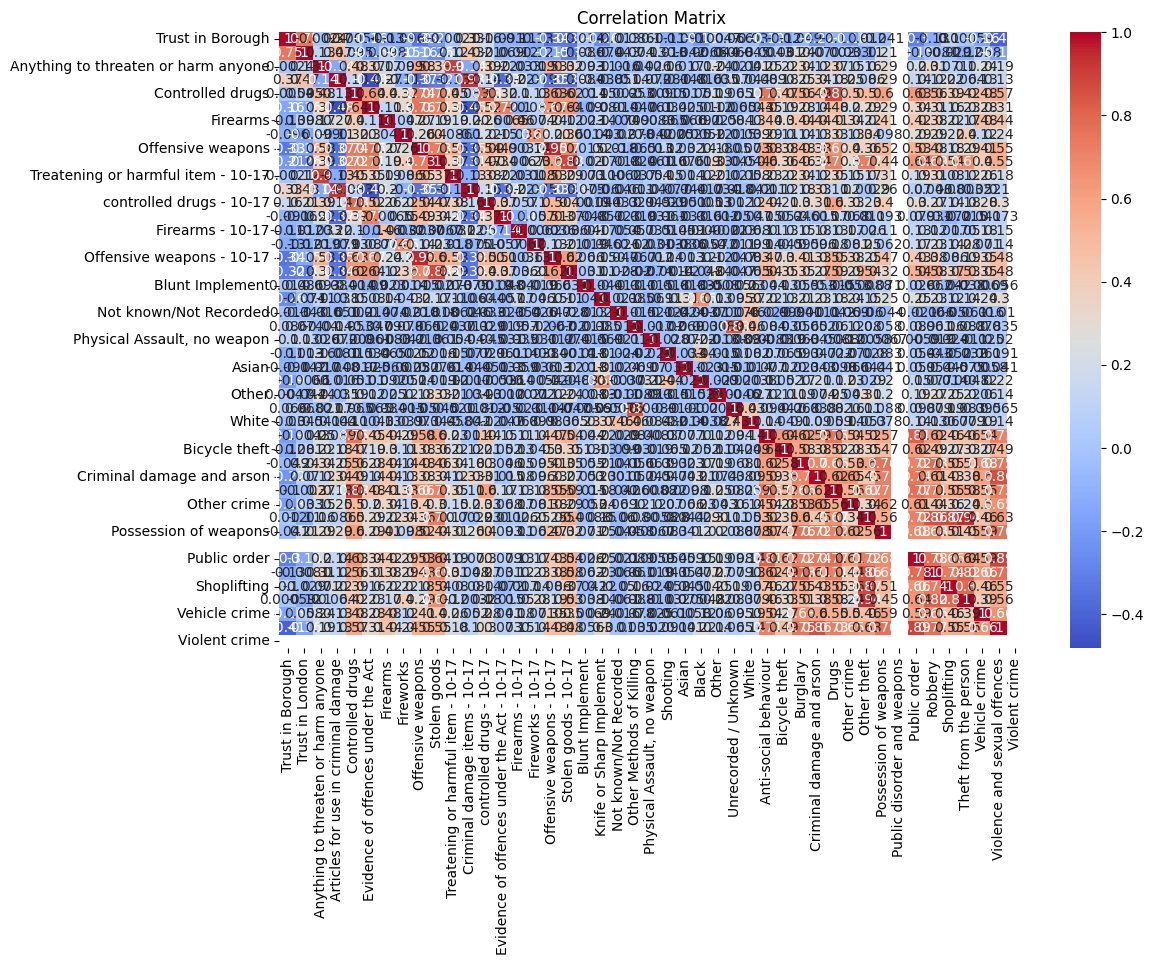

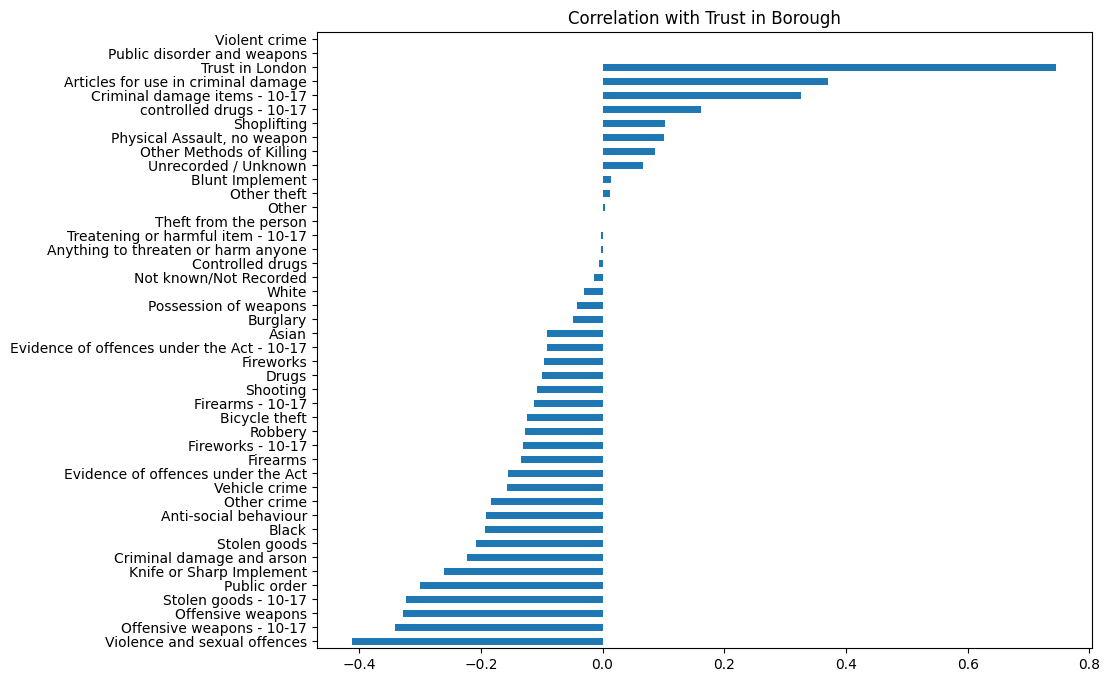

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Bar plot of the correlation with "Trust in Borough"
trust_correlation.drop(labels=["Trust in Borough"]).sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Correlation with Trust in Borough")
plt.show()


In [24]:
df_merged.columns

Index(['YearMonth', 'Borough', 'Trust in Borough', 'Trust in London',
       'Anything to threaten or harm anyone',
       'Articles for use in criminal damage', 'Controlled drugs',
       'Evidence of offences under the Act', 'Firearms', 'Fireworks',
       'Offensive weapons', 'Stolen goods',
       'Treatening or harmful item - 10-17', 'Criminal damage items - 10-17',
       'controlled drugs - 10-17',
       'Evidence of offences under the Act - 10-17', 'Firearms - 10-17',
       'Fireworks - 10-17', 'Offensive weapons - 10-17',
       'Stolen goods - 10-17', 'Blunt Implement', 'Knife or Sharp Implement',
       'Not known/Not Recorded', 'Other Methods of Killing',
       'Physical Assault, no weapon', 'Shooting', 'Asian', 'Black', 'Other',
       'Unrecorded / Unknown', 'White', 'Anti-social behaviour',
       'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs',
       'Other crime', 'Other theft', 'Possession of weapons',
       'Public disorder and weapons', 'Publi

In [25]:
predictors = df_merged.drop(columns=['YearMonth', 'Borough', 'Trust in Borough', 'Trust in London'])
predictors = np.asarray(predictors)
target = df_merged['Trust in Borough']

predictors[0]

array([  0.,  32.,  68.,   0.,   0.,   0.,   0.,   0.,   0.,  15.,  14.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 393.,  12.,  70., 124.,  25.,  12.,
       128.,   8.,   0.,  71.,  11.,  74.,  13., 176., 336.,   0.])

In [26]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

predictors = sm.add_constant(predictors)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Trust in Borough   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     12.63
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           4.11e-37
Time:                        11:12:55   Log-Likelihood:                 381.29
No. Observations:                 248   AIC:                            -680.6
Df Residuals:                     207   BIC:                            -536.5
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8944      0.019     48.340      0.0

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.003466450055200961
R^2 Score: 0.5675389210020578


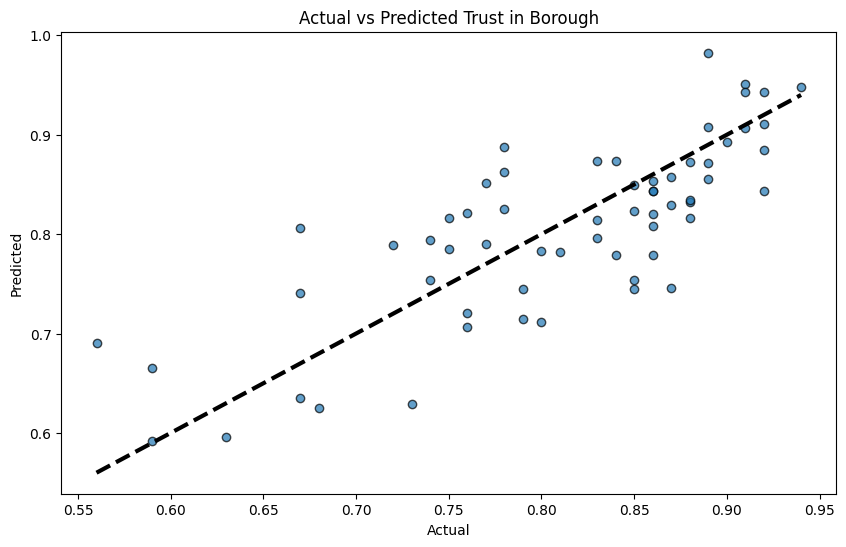

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Trust in Borough')
plt.show()

In [30]:
df_x = df_merged.drop(columns=['YearMonth', 'Borough', 'Trust in Borough', 'Trust in London'])

# Create a mapping of x variables to column names
variable_mapping = {f'x{i}': col for i, col in enumerate(df_x.columns, start=1)}
variable_mapping['const'] = 'Constant'

# Display the mapping
print("Variable Mapping:")
for key, value in variable_mapping.items():
    print(f"{key}: {value}")

Variable Mapping:
x1: Anything to threaten or harm anyone
x2: Articles for use in criminal damage
x3: Controlled drugs
x4: Evidence of offences under the Act
x5: Firearms
x6: Fireworks
x7: Offensive weapons
x8: Stolen goods
x9: Treatening or harmful item - 10-17
x10: Criminal damage items - 10-17
x11: controlled drugs - 10-17
x12: Evidence of offences under the Act - 10-17
x13: Firearms - 10-17
x14: Fireworks - 10-17
x15: Offensive weapons - 10-17
x16: Stolen goods - 10-17
x17: Blunt Implement
x18: Knife or Sharp Implement
x19: Not known/Not Recorded
x20: Other Methods of Killing
x21: Physical Assault, no weapon
x22: Shooting
x23: Asian
x24: Black
x25: Other
x26: Unrecorded / Unknown
x27: White
x28: Anti-social behaviour
x29: Bicycle theft
x30: Burglary
x31: Criminal damage and arson
x32: Drugs
x33: Other crime
x34: Other theft
x35: Possession of weapons
x36: Public disorder and weapons
x37: Public order
x38: Robbery
x39: Shoplifting
x40: Theft from the person
x41: Vehicle crime
x42: V

In [31]:
summary = model.summary2().tables[1]

# Prepare the table
table = []
for i, row in summary.iterrows():
    x_var = f"x{i}"
    coef = row['Coef.']
    p_value = row['P>|t|']
    significant = p_value < 0.05
    table.append([x_var, coef, p_value, significant])

# Convert to DataFrame for better display
result_df = pd.DataFrame(table, columns=['Variable', 'Coefficient', 'P-value', 'Statistically Significant'])
#result_df['Variable'] = str(result_df['Variable'])
#result_df['Variable'] = result_df['Variable'][1:]
result_df['Mapped to'] = result_df.apply(lambda x: variable_mapping[(x['Variable'][1:])], axis=1)

# Display the table
result_df

,Variable,Coefficient,P-value,Statistically Significant,Mapped to
0,xconst,8.944005e-01,9.951023e-115,True,Constant
1,xx1,-6.095209e-07,9.990671e-01,False,Anything to threaten or harm anyone
2,xx2,-6.148474e-05,8.014567e-01,False,Articles for use in criminal damage
3,xx3,1.893599e-04,6.278499e-02,False,Controlled drugs
4,xx4,-4.958443e-04,5.157619e-01,False,Evidence of offences under the Act
5,xx5,-1.569646e-03,2.078660e-01,False,Firearms
6,xx6,6.874508e-03,1.357662e-01,False,Fireworks
7,xx7,4.004530e-05,8.781731e-01,False,Offensive weapons
8,xx8,-1.618453e-07,9.995013e-01,False,Stolen goods
9,xx9,-5.719435e-04,8.230348e-01,False,Treatening or harmful item - 10-17


In [32]:
important_df = result_df[result_df['Statistically Significant']]
important_df

,Variable,Coefficient,P-value,Statistically Significant,Mapped to
0,xconst,8.944005e-01,9.951023e-115,True,Constant
11,xx11,1.222400e-03,5.259063e-03,True,controlled drugs - 10-17
14,xx14,-3.112398e-02,6.460837e-03,True,Fireworks - 10-17
16,xx16,-1.835942e-03,1.919720e-02,True,Stolen goods - 10-17
18,xx18,-4.077057e-02,1.773471e-02,True,Knife or Sharp Implement
27,xx27,4.109443e-02,4.045055e-02,True,White
30,xx30,3.447667e-04,3.454418e-03,True,Burglary
31,xx31,5.882063e-04,3.992161e-03,True,Criminal damage and arson
32,xx32,-4.292790e-04,4.763392e-02,True,Drugs
35,xx35,2.887896e-03,4.334449e-04,True,Possession of weapons


In [33]:
# save x_train, x_test, y_train, y_test to use in the presentation
np.save('presentation_dataframes/X_train_Crime_reg.npy', X_train)
np.save('presentation_dataframes/X_test_Crime_reg.npy', X_test)
np.save('presentation_dataframes/y_train_Crime_reg.npy', y_train)
np.save('presentation_dataframes/y_test_Crime_reg.npy', y_test)